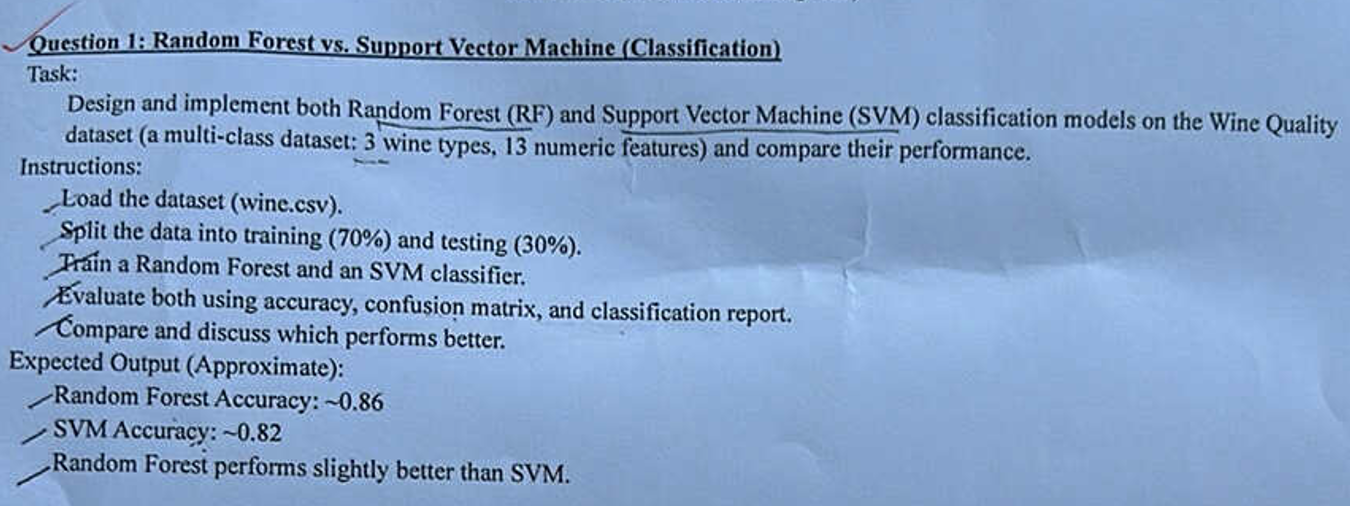

C:\Users\Israk\AppData\Local\Temp\ipykernel_19536\3960702370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


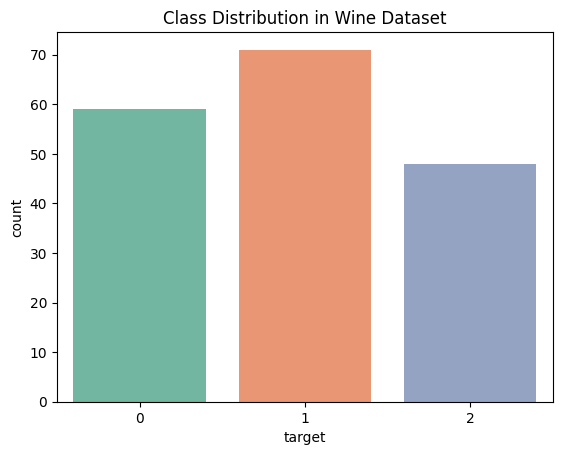

SVM Accuracy: 0.9629629629629629
Random Forest Accuracy: 1.0


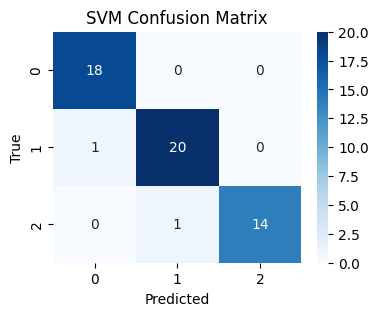

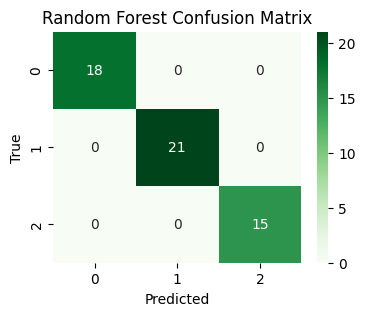


SVM Classification Report:
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       0.95      0.95      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

Random Forest Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



C:\Users\Israk\AppData\Local\Temp\ipykernel_19536\3960702370.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance[rf_idx], y=feature_names[rf_idx], palette='viridis')


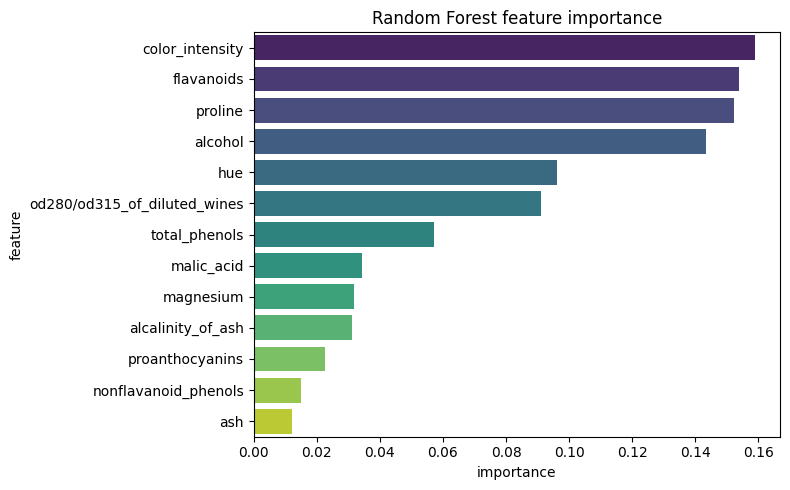

C:\Users\Israk\AppData\Local\Temp\ipykernel_19536\3960702370.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=svm_coef[svm_idx], y=feature_names[svm_idx], palette='viridis')


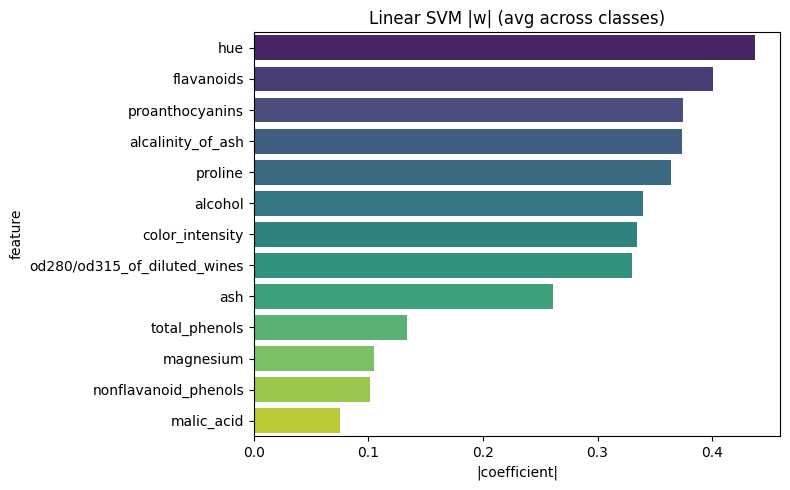

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

sns.countplot(x='target', data=df, palette='Set2')
plt.title('Class Distribution in Wine Dataset')
plt.show()

# Split the dataset into training (70%) and testing (30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features for SVM
# This is scaling (standardizing) all input features so that each has mean = 0 and standard deviation = 1.
# Reason: If one feature has values in the thousands and another is between 0–1, the large-valued feature will dominate.
# Standardizing ensures all features contribute equally.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluating Both Models Using Accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Evaluating Both Models Using Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()

# Evaluating Both Models Using Classification Report
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=target_names))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=target_names))



# ==== Feature importance ==== (If Needed)

feature_names = np.array(feature_names)

# Feature importances (Random Forest)
rf_importance = rf.feature_importances_
rf_idx = np.argsort(rf_importance)[::-1]
plt.figure(figsize=(8,5))
sns.barplot(x=rf_importance[rf_idx], y=feature_names[rf_idx], palette='viridis')
plt.title('Random Forest feature importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.tight_layout()
plt.show()

# Feature importances (linear SVM absolute coefficients, one-vs-rest averaged)
svm_coef = np.mean(np.abs(svm.coef_), axis=0)
svm_idx = np.argsort(svm_coef)[::-1]
plt.figure(figsize=(8,5))
sns.barplot(x=svm_coef[svm_idx], y=feature_names[svm_idx], palette='viridis')
plt.title('Linear SVM |w| (avg across classes)')
plt.xlabel('|coefficient|')
plt.ylabel('feature')
plt.tight_layout()
plt.show()

### Using wine.csv

In [10]:
import pandas as pd

# Column names from UCI description
columns = [
    'WineType', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash',
    'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
    'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280/OD315_of_Diluted_Wines', 'Proline'
]

# Load from URL directly and save as CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
data = pd.read_csv(url, header=None, names=columns)
data.to_csv("wine.csv", index=False)

print("✅ wine.csv saved successfully!")
print(data.head())


✅ wine.csv saved successfully!
   WineType  Alcohol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0         1    14.23        1.71  2.43               15.6        127   
1         1    13.20        1.78  2.14               11.2        100   
2         1    13.16        2.36  2.67               18.6        101   
3         1    14.37        1.95  2.50               16.8        113   
4         1    13.24        2.59  2.87               21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_Intensity   Hue  OD280/OD315_of_Diluted_Wines  Proline  
0             5.64  1.04                   

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# ----------------------------
# 1️⃣ Load the dataset
# ----------------------------
# Make sure 'wine.csv' is in the same directory or provide full path
data = pd.read_csv('wine.csv')

# Display first few rows
print("Dataset Preview:\n", data.head(), "\n")

# ----------------------------
# 2️⃣ Split features and target
# ----------------------------
# Assuming 'WineType' or 'target' is the label column — modify as needed
X = data.drop('WineType', axis=1)
y = data['WineType']

# ----------------------------
# 3️⃣ Split into train and test sets (70-30)
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------
# 4️⃣ Feature scaling for SVM
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# 5️⃣ Train Random Forest
# ----------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# ----------------------------
# 6️⃣ Train Support Vector Machine
# ----------------------------
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)
svm_preds = svm.predict(X_test_scaled)

# ----------------------------
# 7️⃣ Evaluate both models
# ----------------------------
rf_acc = accuracy_score(y_test, rf_preds)
svm_acc = accuracy_score(y_test, svm_preds)

print("🔹 Random Forest Accuracy:", round(rf_acc, 4))
print("🔹 SVM Accuracy:", round(svm_acc, 4))

print("\n===== Random Forest Classification Report =====")
print(classification_report(y_test, rf_preds))

print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

print("\n===== SVM Classification Report =====")
print(classification_report(y_test, svm_preds))

print("Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))


Dataset Preview:
    WineType  Alcohol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0         1    14.23        1.71  2.43               15.6        127   
1         1    13.20        1.78  2.14               11.2        100   
2         1    13.16        2.36  2.67               18.6        101   
3         1    14.37        1.95  2.50               16.8        113   
4         1    13.24        2.59  2.87               21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_Intensity   Hue  OD280/OD315_of_Diluted_Wines  Proline  
0             5.64  1.04                          3.92  